# 1. Entrenamiento Predicción de etiquetas
### Etiquetas a predecir: 01 - 00 - 11 - 10


Importación de librerías

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import kds 
from openpyxl import Workbook
from sklearn import tree


Carga de datos

In [91]:
df_02 = pd.read_csv('EntrenamientoModelo.csv', converters={'D1615': '{:0>2}'.format,'D1413': '{:0>2}'.format,'D1211': '{:0>2}'.format,
                      'D109': '{:0>2}'.format, 'D87': '{:0>2}'.format,'D65': '{:0>2}'.format,'D43': '{:0>2}'.format,
                      'D21': '{:0>2}'.format}, sep =';')

In [92]:
df_02

,Index,num_registro,sd_16,sd_15,sd_14,sd_13,sd_12,sd_11,sd_10,sd_9,...,sd_1,prom_venta,D1615,D1413,D1211,D109,D87,D65,D43,D21
0,0,37301747639677,0,0,0,0,0,0,0,0,...,0,2.25,00,00,00,00,01,00,00,00
1,1,37323816426877,0,1,1,1,1,1,1,0,...,0,1.00,01,11,11,10,00,00,00,00
2,2,37310877495777,1,1,0,0,0,0,1,0,...,0,1.00,11,00,00,10,00,00,00,00
3,3,37323803965677,0,0,1,0,0,0,0,0,...,0,13.20,00,10,00,00,10,00,00,00
4,4,37310895879377,0,0,0,0,0,0,0,0,...,0,2.25,00,00,00,00,11,00,11,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,37314231649377,1,1,1,1,1,1,1,1,...,1,13.20,11,11,11,11,11,11,11,11
19996,19996,37321953780077,1,1,1,1,1,1,1,0,...,1,13.20,11,11,11,10,11,11,11,11
19997,19997,37317592682877,1,1,1,1,1,1,1,1,...,1,13.20,11,11,11,11,11,11,11,11
19998,19998,37316423136677,1,1,1,1,1,1,1,1,...,1,3.30,11,11,11,11,11,11,11,11


Asignación de variables predictiva y entrenamiento

In [93]:
y = df_02['D21'].astype("category")

In [94]:
X =  df_02[['sd_16', 'sd_15', 'sd_14', 'sd_13', 'sd_12', 'sd_11', 'sd_10', 'sd_9', 'sd_8', 'sd_7', 'sd_6', 'sd_5', 'sd_4', 'sd_3']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle = True)

## Modelo

In [96]:
# ==============================================================================

modelo = RandomForestClassifier(max_depth=9, random_state=0)


modelo.fit(X_train, y_train)




RandomForestClassifier(max_depth=9, random_state=0)

In [97]:
joblib.dump(modelo, 'modelo.joblib')

['modelo.joblib']

In [98]:
# Predicciones test
# ==============================================================================
Y_Resultado = modelo.predict(X_test)

In [99]:
y_test.describe()

count     4000
unique       4
top         00
freq      1006
Name: D21, dtype: object

In [100]:
y_test = pd.DataFrame(y_test, columns = ['D21'])

In [101]:
Y_Resultado = pd.DataFrame(Y_Resultado, columns = ['D21'])

In [102]:
y_test.groupby(['D21'])['D21'].count()

D21
00    1006
01     996
10     999
11     999
Name: D21, dtype: int64

In [103]:
Y_Resultado.groupby(['D21'])['D21'].count()

D21
00    1199
01     646
10    1057
11    1098
Name: D21, dtype: int64

In [104]:
Y_Resultado['D21']

0       11
1       11
2       10
3       10
4       00
        ..
3995    10
3996    10
3997    11
3998    00
3999    11
Name: D21, Length: 4000, dtype: object

In [105]:
cf_matrix = confusion_matrix(y_test, Y_Resultado)
cf_matrix

array([[748,  96, 148,  14],
       [190, 326, 349, 131],
       [247, 160, 471, 121],
       [ 14,  64,  89, 832]], dtype=int64)

<AxesSubplot:>

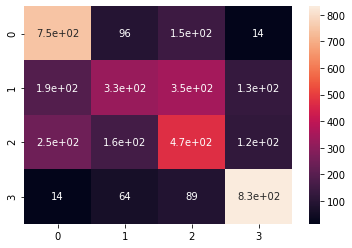

In [106]:
sns.heatmap(cf_matrix, annot = True)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_Resultado))

              precision    recall  f1-score   support

          00       0.62      0.74      0.68      1006
          01       0.50      0.33      0.40       996
          10       0.45      0.47      0.46       999
          11       0.76      0.83      0.79       999

    accuracy                           0.59      4000
   macro avg       0.58      0.59      0.58      4000
weighted avg       0.58      0.59      0.58      4000



In [ ]:
# ==============================================================================

## Modelo 2

In [109]:
y_prob = modelo.predict_proba(X_test)

In [110]:
y_prob[:,1]

array([0.1010839 , 0.3072268 , 0.27818858, ..., 0.1010839 , 0.2462887 ,
       0.1010839 ])

In [132]:
y_test1 = y_test.astype(int)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle = True)
clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.280,0.280,0.280,400.0,1177.0,179.0,2197.5,4400,294.25,400.0,1177.0,4400,179.0,10.0,5.356,20.023,17.793,-12.437,0.536
1,2,0.280,0.280,0.280,400.0,1346.0,159.0,2197.5,4400,336.50,800.0,2523.0,8800,338.0,20.0,11.481,40.046,33.598,-22.117,0.574
2,3,0.280,0.280,0.280,400.0,1233.0,178.0,2197.5,4199,308.25,1200.0,3756.0,12999,516.0,30.0,17.092,59.154,51.292,-34.200,0.570
3,4,0.280,0.280,0.280,400.0,1340.0,177.0,2197.5,4000,335.00,1600.0,5096.0,16999,693.0,40.0,23.190,77.356,68.887,-45.697,0.580
4,5,0.222,0.280,0.270,400.0,1504.0,163.0,2197.5,3982,376.00,2000.0,6600.0,20981,856.0,50.0,30.034,95.477,85.089,-55.055,0.601
5,6,0.222,0.222,0.222,400.0,3126.0,28.0,2197.5,400,781.50,2400.0,9726.0,21381,884.0,60.0,44.259,97.297,87.873,-43.614,0.738
6,7,0.222,0.222,0.222,400.0,3085.0,23.0,2197.5,400,771.25,2800.0,12811.0,21781,907.0,70.0,58.298,99.117,90.159,-31.861,0.833
7,8,0.222,0.222,0.222,400.0,3032.0,34.0,2197.5,194,758.00,3200.0,15843.0,21975,941.0,80.0,72.096,100.000,93.539,-21.443,0.901
8,9,0.222,0.222,0.222,400.0,3141.0,28.0,2197.5,0,785.25,3600.0,18984.0,21975,969.0,90.0,86.389,100.000,96.322,-9.933,0.960
9,10,0.222,0.222,0.222,400.0,2991.0,37.0,2197.5,0,747.75,4000.0,21975.0,21975,1006.0,100.0,100.000,100.000,100.000,0.000,1.000


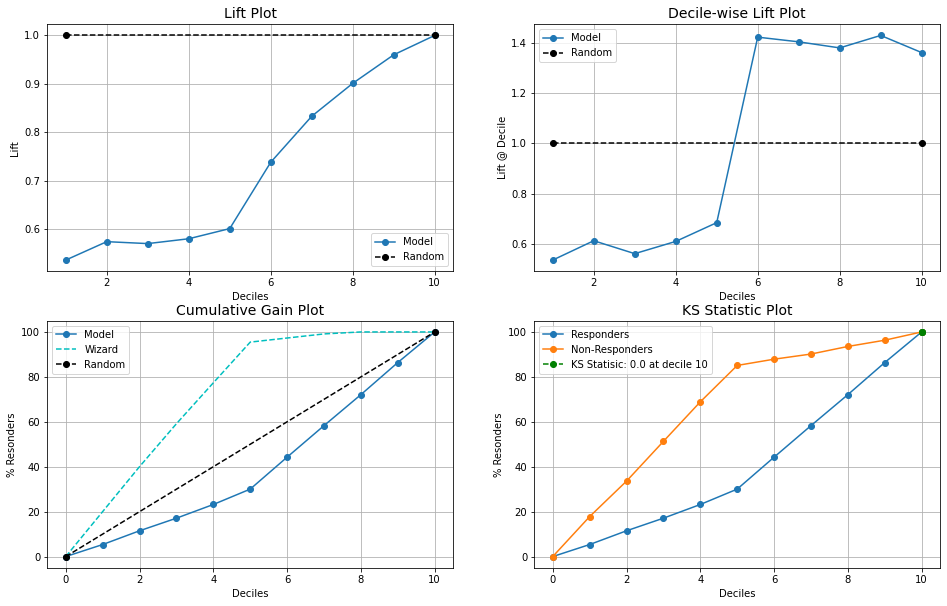

In [133]:
kds.metrics.report(y_test1, y_prob[:,1])